In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib
from thresholding import*
import random
import re

In [64]:
#AMS data sets
df_sim = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\df_sim_img.csv')
df_sim['ids'] = list(zip(df_sim.ListingId_1, df_sim.ListingId_2))
df_full = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\merged_clean_df.csv')
df_full.drop('Unnamed: 0',axis=1,inplace=True)


#Baselines fully labeled
df_base_train = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\UnsupervisedBootAL-master\datasets\wdc_product\features_phones_phones_catalog_train')
df_base_test = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\UnsupervisedBootAL-master\datasets\wdc_product\features_phones_phones_catalog_test')

In [58]:
df_red = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\df_red.csv')
def find_hotel(string):
    if type(string) == str:
        if 'hotel' in string:
            return 'hotel'
        if 'herberg' in string:
            return 'hotel'
        if 'hostel' in string:
            return 'hotel'
        if 'lodge' in string:
            return 'hotel'
        if 'inn' in string:
            return'hotel'
        else:
            return string
    else:
        return string
def delet_helper(string):
    if string in listings:
        return 1
    else:
        return 0
df_red = df_red[df_red['Room_type'] != 'hotel_room']
df_red = df_red[df_red['Room_type'] != 'hotelkamer']
df_red = df_red[df_red['Room_type_category'] != 'hotel_room']
df_red = df_red[df_red['Room_type_category'] != 'hotelkamer']
df_red['Name'] = df_red['Name'].map(find_hotel)
df_red['Host_first_name'] = df_red['Host_first_name'].map(find_hotel)


In [59]:
df_red = df_red[df_red['Name'] != 'hotel']
df_red = df_red[df_red['Host_first_name'] != 'hotel']

df_red['nan'] = df_red.isna().sum(axis=1)
df_red = df_red[df_red['nan'] < 15]
df_red.shape

(3968, 69)

In [69]:
listings = list(df_red['ListingId'])
df_sim['drop'] = df_sim['ListingId_1'].map(delet_helper)
df_sim['drop_1'] = df_sim['ListingId_2'].map(delet_helper)
df_sim['drop_2'] = df_sim['drop'] + df_sim['drop_1']
df_sim = df_sim[df_sim['drop_2'] == 2]

df_sim = df_sim.drop(['drop','drop_1','drop_2'],axis=1)
df_sim.shape

(15944, 108)

In [70]:
df_base_train.rename(columns = {'pair_id':'ids'}, inplace = True)
df_base_test.rename(columns = {'pair_id':'ids'}, inplace = True)
full_base =  pd.concat([df_base_train,df_base_test], axis=0)

In [71]:
def compare(df,id_1,id_2):
    #Compare URLS
    print(df['listing_url'][df['ListingId']==id_1])
    #print(df[df['ListingId']==id_1].values)
    print(df['listing_url'][df['ListingId']==id_2])
    #print(df[df['ListingId']==id_2].values)
    return 
compare(df_full,41709087,41339519)
      

15339    https://www.airbnb.nl/rooms/41709087
Name: listing_url, dtype: object
15209    https://www.airbnb.nl/rooms/41339519
Name: listing_url, dtype: object


In [72]:
sorted_dataset = scoring_unsupervised(df_sim,baseline=False)
sorted_dataset_base = scoring_unsupervised(full_base,baseline=True)

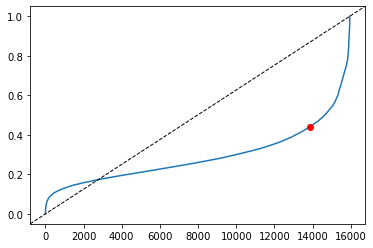

Knee of the curve is at index = 13874
Knee value = 0.44196880027268776


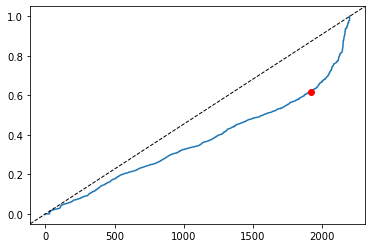

Knee of the curve is at index = 1925
Knee value = 0.6190547717236742


In [73]:
threshold,index = elbow_threshold(sorted_dataset) 
threshold_base,index_base = elbow_threshold(sorted_dataset_base) 

In [74]:
matches_score_weight, nonmatches_score_weight = unsupervised_labels(sorted_dataset,threshold)
matches_score_weight_base, nonmatches_score_weight_base = unsupervised_labels(sorted_dataset_base,threshold_base)

In [75]:
columns = ['ids','agg_score','weights','uns_label']
uns_labels = matches_score_weight+nonmatches_score_weight
df_uns = pd.DataFrame(uns_labels,columns=columns)
df_uns 

,ids,agg_score,weights,uns_label
0,"(35302424, 23729261)",0.441969,0.000000,1.0
1,"(17236712, 1105924)",0.442056,0.000156,1.0
2,"(1620658, 12099302)",0.442258,0.000518,1.0
3,"(847093, 35396160)",0.442306,0.000604,1.0
4,"(9247120, 21005647)",0.442474,0.000906,1.0
...,...,...,...,...
15939,"(590236, 4522340)",0.441743,0.000511,0.0
15940,"(26465711, 23302270)",0.441832,0.000309,0.0
15941,"(35302424, 11306432)",0.441838,0.000297,0.0
15942,"(31831416, 2871016)",0.441893,0.000171,0.0


In [76]:
columns_base = ['ids','agg_score','weights','uns_label']
uns_labels_base = matches_score_weight_base+nonmatches_score_weight_base
df_uns_base = pd.DataFrame(uns_labels_base,columns=columns_base)
df_uns_base

,ids,agg_score,weights,uns_label
0,http://dws.products.wdc/node3566ad9489c57f9f5f...,0.619055,0.000000,1.0
1,http://dws.products.wdc/node58ed727e945adbead7...,0.620203,0.003015,1.0
2,http://dws.products.wdc/node129ecaaf6c73f6771f...,0.620231,0.003088,1.0
3,http://dws.products.wdc/node2bc76a166178e2a7a4...,0.621105,0.005383,1.0
4,http://dws.products.wdc/nodef8ad5ee0be82c8b835...,0.622553,0.009182,1.0
...,...,...,...,...
2197,http://dws.products.wdc/nodeda95658608d772fe1c...,0.617827,0.001984,0.0
2198,http://dws.products.wdc/node7988ba2b263651ecd5...,0.618432,0.001006,0.0
2199,http://dws.products.wdc/node12bf19db5244369270...,0.618827,0.000368,0.0
2200,http://dws.products.wdc/nodec5e3616d1f2cb391b6...,0.618950,0.000170,0.0


In [77]:
df_uns_label= df_sim.merge(df_uns,on='ids')
df_uns_label.to_csv('df_uns_label_img_red_hot.csv',index=False)

In [50]:
df_uns_label_base= full_base.merge(df_uns_base,on='ids')
df_uns_label_base.to_csv('df_uns_label_base_train.csv',index=False)

In [78]:
df_uns_label

,ListingId_1,ListingId_2,Name_jaro_winker,Name_levenshtein_sim,Name_jaccard_sim,Name_relaxed_jaccard_sim,Name_overlap_sim,Name_containment_sim,Bedrooms_binary,Bedrooms_numerical,...,Star_rating_binary,Star_rating_numerical,Xl_picture_url_img,LaBSE_emb_LaBSE_cos,Descrp_tfidf_tf_idf_cos,Lat_Lng_geo,ids,agg_score,weights,uns_label
0,10584731,10119487,0.628882,0.478261,0.500000,0.500000,0.0,0.800000,1.0,1.0,...,1.0,1.00000,0.997553,0.791916,0.170291,0.944193,"(10584731, 10119487)",0.413899,0.063512,0.0
1,11430214,10584731,0.631856,0.217391,0.071429,0.071429,0.0,0.142857,0.0,0.0,...,1.0,1.00000,0.996849,0.816453,0.036062,0.931951,"(11430214, 10584731)",0.530668,0.158949,1.0
2,11430214,11217131,0.552635,0.145833,0.071429,0.071429,0.0,0.142857,0.0,0.0,...,1.0,1.00000,0.998575,0.735681,0.017087,0.929554,"(11430214, 11217131)",0.349051,0.210236,0.0
3,12058561,1041309,0.658274,0.176471,0.000000,0.000000,0.0,0.000000,1.0,1.0,...,0.0,0.69697,0.999581,0.778991,0.005625,0.951064,"(12058561, 1041309)",0.140950,0.681087,0.0
4,12059101,11347669,0.832866,0.441176,0.250000,0.250000,0.0,0.500000,0.0,0.0,...,1.0,1.00000,1.000000,0.707117,0.003812,0.953254,"(12059101, 11347669)",0.320719,0.274340,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15939,42510929,36272271,0.776677,0.425532,0.555556,0.555556,0.0,0.714286,1.0,1.0,...,1.0,1.00000,0.999458,0.758804,0.093033,0.965654,"(42510929, 36272271)",0.360464,0.184414,0.0
15940,5315586,18224290,0.631823,0.307692,0.000000,0.111111,0.0,0.000000,0.0,0.0,...,-1.0,-1.00000,0.997587,0.700987,-1.000000,0.953605,"(5315586, 18224290)",0.155476,0.648219,0.0
15941,5315586,27795712,0.662645,0.333333,0.000000,0.125000,0.0,0.000000,0.0,0.0,...,0.0,0.69697,0.997954,0.777321,-1.000000,0.982979,"(5315586, 27795712)",0.214529,0.514605,0.0
15942,25853345,25433802,0.657520,0.204545,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,-1.0,-1.00000,0.996721,0.932478,0.158012,0.943027,"(25853345, 25433802)",0.729495,0.515250,1.0


In [51]:
df_uns_label_base

,source_id,target_id,ids,label,cosine_tfidf,<http://schema.org/Product/phone_carrier>_lev,<http://schema.org/Product/phone_carrier>_jaccard,<http://schema.org/Product/phone_carrier>_relaxed_jaccard,<http://schema.org/Product/phone_carrier>_overlap,<http://schema.org/Product/phone_carrier>_containment,...,<http://schema.org/Product/front_cam_resolution>_overlap,<http://schema.org/Product/front_cam_resolution>_containment,<http://schema.org/Product/product_type>_lev,<http://schema.org/Product/product_type>_jaccard,<http://schema.org/Product/product_type>_relaxed_jaccard,<http://schema.org/Product/product_type>_overlap,<http://schema.org/Product/product_type>_containment,agg_score,weights,uns_label
0,http://dws.products.wdc/nodea5d4db945aebe16d83...,http://dws.products.catalog/f7b18a6d-8abc-4372...,http://dws.products.wdc/nodea5d4db945aebe16d83...,True,0.214443,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.515955,0.166543,0.0
1,http://dws.products.wdc/nodeddfaf342e553eb3ed7...,http://dws.products.catalog/20fafb44-45fc-43ae...,http://dws.products.wdc/nodeddfaf342e553eb3ed7...,True,0.448177,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.324946,0.475093,0.0
2,http://dws.products.wdc/node3566ad9489c57f9f5f...,http://dws.products.catalog/43ae8958-9d57-41fe...,http://dws.products.wdc/node3566ad9489c57f9f5f...,True,0.431848,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.980193,0.948005,1.0
3,http://dws.products.wdc/node55289a35c396b0c12b...,http://dws.products.catalog/20fafb44-45fc-43ae...,http://dws.products.wdc/node55289a35c396b0c12b...,True,0.320956,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.575401,0.070516,0.0
4,http://dws.products.wdc/node79c0148995a9fa6594...,http://dws.products.catalog/9e1bd633-daef-4aa1...,http://dws.products.wdc/node79c0148995a9fa6594...,True,0.201448,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.572864,0.074615,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,http://dws.products.wdc/node9a9c8d58b92aecefe4...,http://dws.products.catalog/9d6d80b5-cc25-4f52...,http://dws.products.wdc/node9a9c8d58b92aecefe4...,False,0.003960,0.0625,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.5,0.0,0.0,0.0,0.0,0.031459,0.949183,0.0
2198,http://dws.products.wdc/node769ce3c43235b12058...,http://dws.products.catalog/2aecdf00-c852-4f04...,http://dws.products.wdc/node769ce3c43235b12058...,False,0.025390,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.105162,0.830124,0.0
2199,http://dws.products.wdc/node06edc149e3ceee41df...,http://dws.products.catalog/f64ddc54-7fe9-490e...,http://dws.products.wdc/node06edc149e3ceee41df...,False,0.083605,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.103704,0.832481,0.0
2200,http://dws.products.wdc/node2295d9baf9ae6e5a6a...,http://dws.products.catalog/f7b18a6d-8abc-4372...,http://dws.products.wdc/node2295d9baf9ae6e5a6a...,False,0.150618,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.490353,0.207900,0.0
